In [1]:
import torch
from torch import Tensor
from torch.nn import Linear, Conv2d, MSELoss, CrossEntropyLoss, functional as F
from torch.optim import SGD, Adam, SGD, RMSprop
from torch.autograd import Variable
import numpy as np

In [2]:
def sine_data_generator(data_size):
    inputs = []
    labels = []

    for i in range(data_size):
        x = np.random.randint(-1000, 1000) / 200.0
        y = np.sin(x)

        inputs.append([x])
        labels.append([y])
    return np.array(inputs), np.array(labels)

dtt = sine_data_generator(10)
dtt

(array([[-1.49 ],
        [ 3.015],
        [-0.69 ],
        [ 2.605],
        [-2.065],
        [-0.985],
        [-1.415],
        [-1.5  ],
        [ 3.785],
        [ 2.35 ]]),
 array([[-0.99673775],
        [ 0.1262548 ],
        [-0.63653718],
        [ 0.5112105 ],
        [-0.88034671],
        [-0.83327209],
        [-0.98788828],
        [-0.99749499],
        [-0.59992499],
        [ 0.71147335]]))

In [3]:
class ShallowNet(torch.nn.Module):
    def __init__(self):
        super(ShallowNet, self).__init__()
        self.lin1 = Linear(1, 190)
        self.lin2 = Linear(190, 1)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        return x

In [4]:
class DeepNet(torch.nn.Module):

    def __init__(self):
        super(DeepNet, self).__init__()
        self.lin1 = Linear(1, 5)
        self.lin2 = Linear(5, 10)
        self.lin3 = Linear(10, 10)
        self.lin4 = Linear(10, 10)
        self.lin5 = Linear(10, 10)
        self.lin6 = Linear(10, 10)
        self.lin7 = Linear(10, 5)

        self.lin8 = Linear(5, 1)

    def forward(self, x):
        x = F.leaky_relu(self.lin1(x))
        x = F.leaky_relu(self.lin2(x))
        x = F.leaky_relu(self.lin3(x))
        x = F.leaky_relu(self.lin4(x))
        x = F.leaky_relu(self.lin5(x))
        x = F.leaky_relu(self.lin6(x))
        x = F.leaky_relu(self.lin7(x))

        x = self.lin8(x)
        return x


In [5]:
def train_model(model, X, y, epochs, critereon, optimizer):
    epoch_list = []
    loss_list = []
    grad_list = []

    for e in range(epochs):
        prediction = model(X)
        loss = critereon(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_list.append(e)
        loss_list.append(loss.detach().numpy())

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5

        grad_list.append(grad_norm)

        print("Epoch: {} Loss: {}".format(e, loss.item()))

    return epoch_list, loss_list, grad_list, prediction


nb_epochs = 100
data_size = 10000

x, y = sine_data_generator(data_size)


In [6]:
shal_model = ShallowNet()
optimizer = Adam(shal_model.parameters(), lr=0.01)
critereon = MSELoss()

shal_loss_list = []

# print(x.shape)
# print(y.shape)

pytorch_total_params = sum(p.numel() for p in shal_model.parameters())
print(pytorch_total_params)
x_m1, y_m1 = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
m1_epoch_arr, shal_loss_list, m1_grad_arr, m1_prediction = train_model(shal_model, x_m1, y_m1, nb_epochs, critereon, optimizer)

571
Epoch: 0 Loss: 1.448018193244934
Epoch: 1 Loss: 0.7848150730133057
Epoch: 2 Loss: 1.216307282447815
Epoch: 3 Loss: 0.7419083118438721
Epoch: 4 Loss: 0.47301268577575684
Epoch: 5 Loss: 0.6456096768379211
Epoch: 6 Loss: 0.7462783455848694
Epoch: 7 Loss: 0.5789528489112854
Epoch: 8 Loss: 0.386416494846344
Epoch: 9 Loss: 0.3641996681690216
Epoch: 10 Loss: 0.442674845457077
Epoch: 11 Loss: 0.4491356313228607
Epoch: 12 Loss: 0.3512009084224701
Epoch: 13 Loss: 0.2530720829963684
Epoch: 14 Loss: 0.2348802238702774
Epoch: 15 Loss: 0.2640199065208435
Epoch: 16 Loss: 0.26099875569343567
Epoch: 17 Loss: 0.20681215822696686
Epoch: 18 Loss: 0.15087634325027466
Epoch: 19 Loss: 0.1355273425579071
Epoch: 20 Loss: 0.14622049033641815
Epoch: 21 Loss: 0.14174048602581024
Epoch: 22 Loss: 0.11058364063501358
Epoch: 23 Loss: 0.07978565245866776
Epoch: 24 Loss: 0.07240234315395355
Epoch: 25 Loss: 0.07708394527435303
Epoch: 26 Loss: 0.07042783498764038
Epoch: 27 Loss: 0.051393888890743256
Epoch: 28 Loss: 0

In [7]:
deep_model = DeepNet()
optimizer = Adam(deep_model.parameters(), lr=0.01)
critereon = MSELoss()

deep_loss_list = []

# print(x.shape)
# print(y.shape)

pytorch_total_params = sum(p.numel() for p in deep_model.parameters())
print(pytorch_total_params)
x_m2, y_m2 = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
m2_epoch_arr, deep_loss_list, m2_grad_arr, m2_prediction = train_model(deep_model, x_m2, y_m2, nb_epochs, critereon, optimizer)

571
Epoch: 0 Loss: 0.7224450707435608
Epoch: 1 Loss: 0.7062200903892517
Epoch: 2 Loss: 0.6912059187889099
Epoch: 3 Loss: 0.6770094037055969
Epoch: 4 Loss: 0.6628468632698059
Epoch: 5 Loss: 0.6485394835472107
Epoch: 6 Loss: 0.6341359615325928
Epoch: 7 Loss: 0.6181987524032593
Epoch: 8 Loss: 0.6003130078315735
Epoch: 9 Loss: 0.5806775689125061
Epoch: 10 Loss: 0.5610612034797668
Epoch: 11 Loss: 0.5414664149284363
Epoch: 12 Loss: 0.5218747854232788
Epoch: 13 Loss: 0.5058028101921082
Epoch: 14 Loss: 0.4984806180000305
Epoch: 15 Loss: 0.49888530373573303
Epoch: 16 Loss: 0.5021586418151855
Epoch: 17 Loss: 0.4994431138038635
Epoch: 18 Loss: 0.4889073669910431
Epoch: 19 Loss: 0.47330737113952637
Epoch: 20 Loss: 0.458710640668869
Epoch: 21 Loss: 0.44483208656311035
Epoch: 22 Loss: 0.4306577146053314
Epoch: 23 Loss: 0.4119718670845032
Epoch: 24 Loss: 0.39458945393562317
Epoch: 25 Loss: 0.37578925490379333
Epoch: 26 Loss: 0.34841683506965637
Epoch: 27 Loss: 0.32338231801986694
Epoch: 28 Loss: 0.29

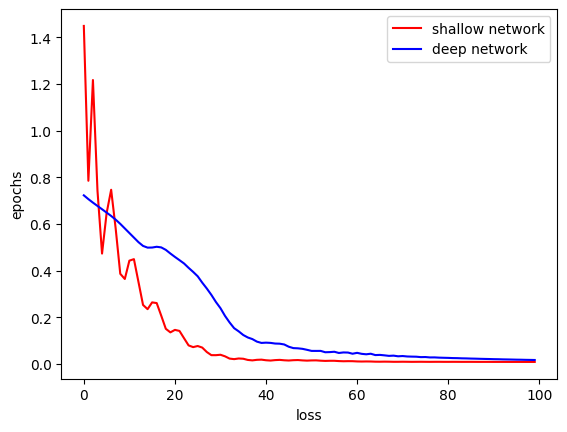

In [8]:
import matplotlib.pyplot as plt


plt.plot(shal_loss_list, color='red', label="shallow network")
plt.plot(deep_loss_list, color='blue', label="deep network")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.legend()

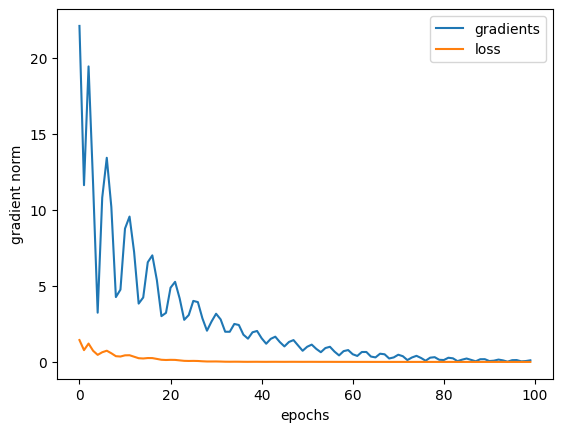

In [9]:
plt.plot(m1_grad_arr, label="gradients")
plt.plot(shal_loss_list, label="loss")
plt.xlabel("epochs")
plt.ylabel("gradient norm")
plt.legend()

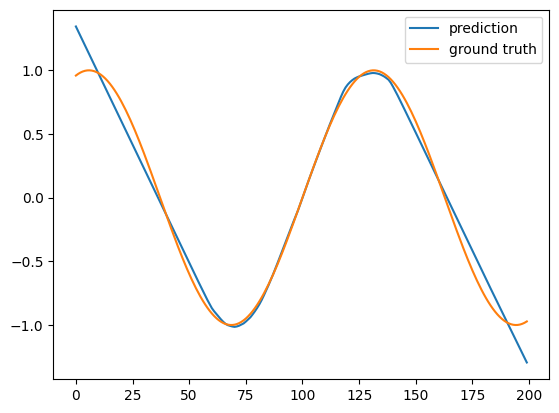

In [10]:

eg_data = np.arange(-5, 5, 0.05)
eg_label = np.sin(eg_data)
new_list = []
simple_tru = eg_label.tolist()

for eg in eg_data:
    new_list.append([eg.round(2)])

eg_data = np.array(new_list)
eg_data = torch.tensor(eg_data, dtype=torch.float32)
sm_pred = shal_model(eg_data).tolist()
simple_pred = []

for smp in sm_pred:
    simple_pred.append(smp[0])

plt.plot(simple_pred, label='prediction')
plt.plot(simple_tru, label='ground truth')
plt.legend()

In [11]:
deep_model.eval()
test_data = sine_data_generator(1)
prediction = deep_model(Variable(Tensor(test_data[0][0])))
print("Prediction: {}".format(prediction))
print("Expected: {}".format(test_data))

Prediction: tensor([0.4949], grad_fn=<ViewBackward0>)
Expected: (array([[-3.66]]), array([[0.49549737]]))


In [12]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=64, shuffle=True)


test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])),
        batch_size=1000, shuffle=True)




100%|██████████| 9912422/9912422 [00:00<00:00, 35976009.40it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 2509284.18it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24513484.74it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11737848.90it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [13]:
class CNNet(torch.nn.Module):
    def __init__(self):
        super(CNNet, self).__init__()

        self.conv1 = Conv2d(1, 6, 5)
        self.conv2 = Conv2d(6, 16, 5)
        self.lin1 = Linear(16 * 5 * 5, 120)
        self.lin2 = Linear(120, 84)
        self.lin3 = Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))

        x = self.lin3(x)
        return x

In [14]:
class CNNet2(torch.nn.Module):
      def __init__(self):
        super(CNNet2, self).__init__()
        self.conv1 = Conv2d(1, 32, 5)
        self.conv2 = Conv2d(32, 32, 5)
        self.conv3 = Conv2d(32, 64, 5)
        self.lin1 = Linear(1024, 256)
        self.lin2 = Linear(256, 10)

      def forward(self, x):
          x = F.relu(self.conv1(x))
          x = F.relu(F.max_pool2d(self.conv2(x), 2))

          #dropout layers
          x = F.dropout(x, p=0.5, training=self.training)
          x = F.relu(F.max_pool2d(self.conv3(x), 2))
          x = F.dropout(x, p=0.5, training=self.training)

          x = x.view(x.size()[0], -1)
          x = F.relu(self.lin1(x))
          x = F.dropout(x, training=self.training)
          x = self.lin2(x)

          return F.log_softmax(x, dim=1)

In [15]:
def train_epoch(model, optimizer, epoch, train_data_loader, log_frequency):

    model.train()
    criterion = CrossEntropyLoss()
    num_correct = 0
    training_loss = 0
    counter = 0
    num_samples = 0

    for batch_index, (data, truth) in enumerate(train_data_loader):
        counter += 1
        data, truth = Variable(data), Variable(truth)
        optimizer.zero_grad()

        output = model(data)
        loss = criterion(output, truth)
        loss.backward()
        optimizer.step()

        training_loss += loss.data

        prediction_val = np.argmax(output.data, axis=1)
        num_samples += truth.size(0)
        num_correct += (prediction_val == truth).sum().item()
        acc = 100.0 * num_correct / num_samples

        # showing/printing log
        if batch_index % log_frequency == 0:
            print('Training set, Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
                epoch, batch_index * len(data), len(train_data_loader.dataset),
                loss.data))
            print("Training Accuracy: ", round(acc,2))
    training_loss /= counter
    return training_loss, round(acc,2)


def test_epoch(model, epoch, test_data_loader):
    model.eval()
    testing_loss = 0
    num_correct = 0

    criterion = CrossEntropyLoss(size_average=False)

    for data, truth in test_data_loader:
        data, truth = Variable(data), Variable(truth)

        output = model(data)
        testing_loss += criterion(output, truth).data

        prediction_val = np.argmax(output.data, axis=1)
        num_correct = num_correct + np.equal(prediction_val, truth.data).sum()

    # Showing/Printing log
    testing_loss /= len(test_data_loader.dataset)
    print('\nTesting set, Epoch {} , Average loss: {:.4f}, Testing Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        testing_loss, num_correct, len(test_data_loader.dataset),
        100. * num_correct))
    return testing_loss


In [16]:
model= CNNet()

lr = 0.01
momentum = 0.5
optimizer = SGD(model.parameters(), lr, momentum)
m0_loss_list = []
m0_acc_list = []
m0_grad_list = []

epochs = 5
log_interval = 250
for epoch in range(1, epochs + 1):
    loss, acc = train_epoch(model, optimizer, epoch, train_loader, log_interval)

    m0_loss_list.append(loss)
    m0_acc_list.append(acc)

    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy()**2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5

    m0_grad_list.append(grad_norm)

    test_epoch(model, epoch, test_loader)

Training set, Epoch: 1 [0/60000]	Loss: 2.303939
Training Accuracy:  3.12
Training set, Epoch: 1 [16000/60000]	Loss: 0.307037
Training Accuracy:  39.6
Training set, Epoch: 1 [32000/60000]	Loss: 0.641528
Training Accuracy:  64.03
Training set, Epoch: 1 [48000/60000]	Loss: 0.255061
Training Accuracy:  73.63


/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Testing set, Epoch 1 , Average loss: 0.1417, Testing Accuracy: 9559/10000 (955900%)

Training set, Epoch: 2 [0/60000]	Loss: 0.363739
Training Accuracy:  87.5
Training set, Epoch: 2 [16000/60000]	Loss: 0.105602
Training Accuracy:  95.7
Training set, Epoch: 2 [32000/60000]	Loss: 0.101194
Training Accuracy:  95.99
Training set, Epoch: 2 [48000/60000]	Loss: 0.049389
Training Accuracy:  96.19

Testing set, Epoch 2 , Average loss: 0.0842, Testing Accuracy: 9721/10000 (972100%)

Training set, Epoch: 3 [0/60000]	Loss: 0.029202
Training Accuracy:  100.0
Training set, Epoch: 3 [16000/60000]	Loss: 0.195683
Training Accuracy:  97.32
Training set, Epoch: 3 [32000/60000]	Loss: 0.162830
Training Accuracy:  97.34
Training set, Epoch: 3 [48000/60000]	Loss: 0.081964
Training Accuracy:  97.43

Testing set, Epoch 3 , Average loss: 0.0678, Testing Accuracy: 9780/10000 (978000%)

Training set, Epoch: 4 [0/60000]	Loss: 0.072734
Training Accuracy:  95.31
Training set, Epoch: 4 [16000/60000]	Loss: 0.054653
Tr

Text(0, 0.5, 'loss')

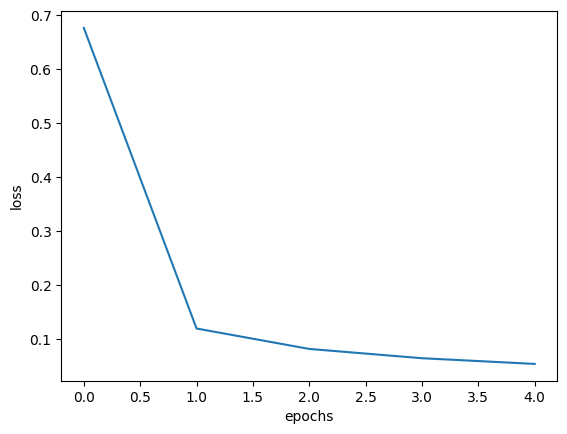

In [17]:
plt.plot(m0_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')


Text(0, 0.5, 'accuracy')

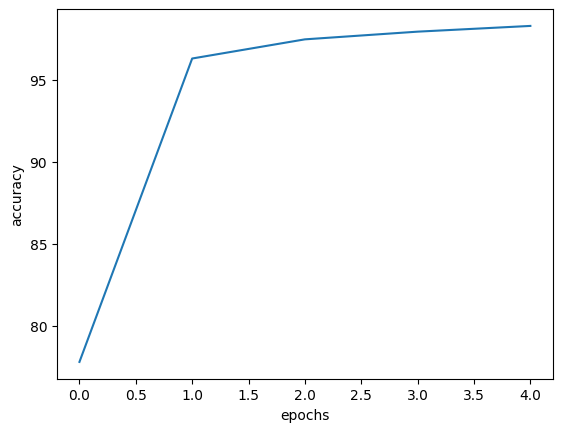

In [18]:
plt.plot(m0_acc_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'Gradient norm')

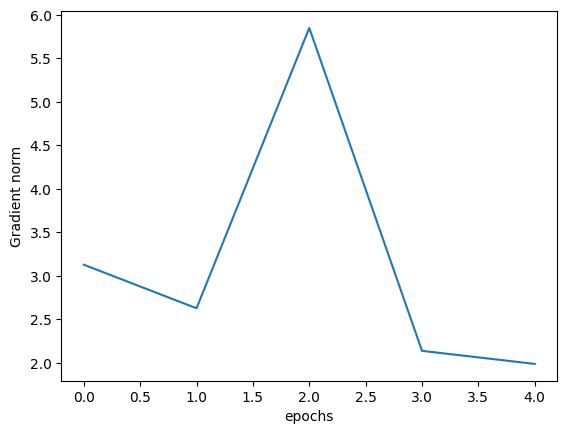

In [19]:
plt.plot(m0_grad_list)
plt.xlabel('epochs')
plt.ylabel('Gradient norm')

In [20]:
model_1= CNNet2()

lr = 0.01
momentum = 0.5
optimizer = SGD(model_1.parameters(), lr=lr, momentum=momentum)
m1_loss_list = []
m1_tstloss_list = []
m1_acc_list = []
grad_list = []

epochs = 5
log_frequency = 100
for epoch in range(1, epochs + 1):
    loss, acc = train_epoch(model_1, optimizer, epoch, train_loader, log_frequency=log_frequency)

    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy()**2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5

    grad_list.append(grad_norm)

    m1_loss_list.append(loss)
    m1_acc_list.append(acc)
    tst_loss = test_epoch(model_1, epoch, test_loader)
    m1_tstloss_list.append(tst_loss)

Training set, Epoch: 1 [0/60000]	Loss: 2.332044
Training Accuracy:  10.94
Training set, Epoch: 1 [6400/60000]	Loss: 1.775557
Training Accuracy:  20.56
Training set, Epoch: 1 [12800/60000]	Loss: 0.807634
Training Accuracy:  42.8
Training set, Epoch: 1 [19200/60000]	Loss: 0.441526
Training Accuracy:  55.47
Training set, Epoch: 1 [25600/60000]	Loss: 0.519904
Training Accuracy:  63.05
Training set, Epoch: 1 [32000/60000]	Loss: 0.416992
Training Accuracy:  68.11
Training set, Epoch: 1 [38400/60000]	Loss: 0.226857
Training Accuracy:  71.73
Training set, Epoch: 1 [44800/60000]	Loss: 0.428907
Training Accuracy:  74.41
Training set, Epoch: 1 [51200/60000]	Loss: 0.176990
Training Accuracy:  76.65
Training set, Epoch: 1 [57600/60000]	Loss: 0.300147
Training Accuracy:  78.38

Testing set, Epoch 1 , Average loss: 0.1136, Testing Accuracy: 9653/10000 (965300%)

Training set, Epoch: 2 [0/60000]	Loss: 0.207754
Training Accuracy:  92.19
Training set, Epoch: 2 [6400/60000]	Loss: 0.182606
Training Accura

Text(0, 0.5, 'loss')

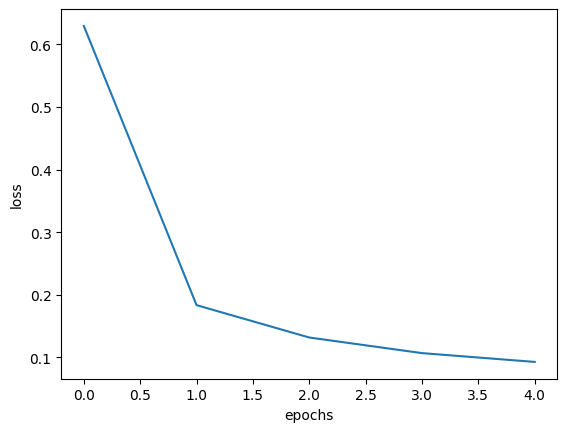

In [21]:
plt.plot(m1_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')


Text(0, 0.5, 'accuracy')

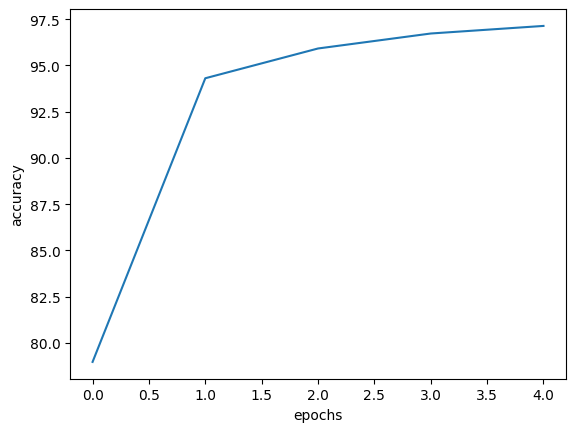

In [22]:
plt.plot(m1_acc_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')

Random label

In [23]:
trainset = datasets.MNIST('data', train = True, download = False,
                transform = transforms.Compose([
                transforms.Resize((32,32)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ]))
temp = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
trainset.targets = temp
train_loader_rand = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('data', train = False,
            transform = transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ]))
test_loader_rand = torch.utils.data.DataLoader(testset ,batch_size = 1000, shuffle=True)

In [24]:
model= CNNet()

lr = 0.01
momentum = 0.5
optimizer = SGD(model.parameters(), lr, momentum)
m0_loss_list = []
m0_acc_list = []
m0_grad_list = []
m0_tstloss_list = []


epochs = 5
log_freq = 200
for epoch in range(1, epochs + 1):
    loss, acc = train_epoch(model, optimizer, epoch, train_loader_rand, log_freq)

    m0_loss_list.append(loss)
    m0_acc_list.append(acc)

    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy()**2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5

    m0_grad_list.append(grad_norm)
    tst_loss = test_epoch(model, epoch, test_loader_rand)
    m0_tstloss_list.append(tst_loss)


Training set, Epoch: 1 [0/60000]	Loss: 2.307849
Training Accuracy:  4.69
Training set, Epoch: 1 [12800/60000]	Loss: 2.300342
Training Accuracy:  9.96
Training set, Epoch: 1 [25600/60000]	Loss: 2.301854
Training Accuracy:  10.16
Training set, Epoch: 1 [38400/60000]	Loss: 2.306227
Training Accuracy:  10.04
Training set, Epoch: 1 [51200/60000]	Loss: 2.300218
Training Accuracy:  10.06

Testing set, Epoch 1 , Average loss: 2.3036, Testing Accuracy: 1259/10000 (125900%)

Training set, Epoch: 2 [0/60000]	Loss: 2.302014
Training Accuracy:  10.94
Training set, Epoch: 2 [12800/60000]	Loss: 2.308066
Training Accuracy:  10.23
Training set, Epoch: 2 [25600/60000]	Loss: 2.306197
Training Accuracy:  10.14
Training set, Epoch: 2 [38400/60000]	Loss: 2.299134
Training Accuracy:  10.07
Training set, Epoch: 2 [51200/60000]	Loss: 2.301258
Training Accuracy:  10.1

Testing set, Epoch 2 , Average loss: 2.3048, Testing Accuracy: 791/10000 (79100%)

Training set, Epoch: 3 [0/60000]	Loss: 2.299923
Training Accu

In [25]:
(m0_loss_list)

[tensor(2.3031),
 tensor(2.3026),
 tensor(2.3025),
 tensor(2.3024),
 tensor(2.3023)]

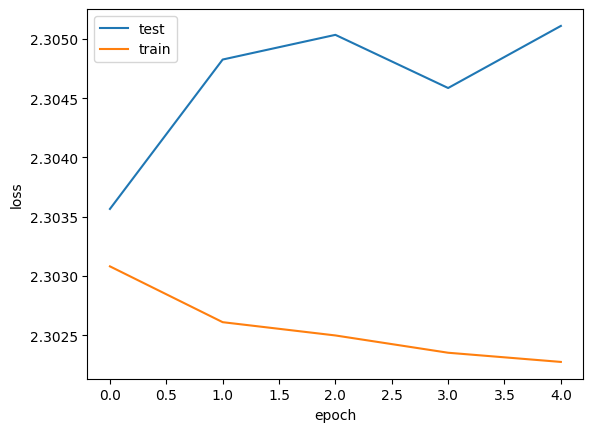

In [26]:
plt.plot(m0_tstloss_list, label='test')
plt.plot(m0_loss_list, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

Comparing number of parameters

In [27]:
class Model_type_1 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 250)
        self.lin2 = Linear(250, 500)
        self.lin3 = Linear(500, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val

class Model_type_2 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 60)
        self.lin2 = Linear(60, 120)
        self.lin3 = Linear(120, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val


class Model_type_3 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 100)
        self.lin2 = Linear(100, 200)
        self.lin3 = Linear(200, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val


class Model_type_4 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 350)
        self.lin2 = Linear(350, 600)
        self.lin3 = Linear(600, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val



class Model_type_5 (torch.nn.Module):
     def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 5)
        self.lin2 = Linear(5, 9)
        self.lin3 = Linear(9, 10)

     def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val


class Model_type_6 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 50)
        self.lin2 = Linear(50, 100)
        self.lin3 = Linear(100, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val

class Model_type_7 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 25)
        self.lin2 = Linear(25, 50)
        self.lin3 = Linear(50, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val

class Model_type_8 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 200)
        self.lin2 = Linear(200, 400)
        self.lin3 = Linear(400, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val


class Model_type_9 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 150)
        self.lin2 = Linear(150, 300)
        self.lin3 = Linear(300, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val


class Model_type_10 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = Linear(784, 280)
        self.lin2 = Linear(280, 560)
        self.lin3 = Linear(560, 10)

    def forward(self, val):
        val = F.relu(self.lin1(val))
        val = F.relu(self.lin2(val))
        val = self.lin3(val)
        return val

In [28]:
trainset = datasets.MNIST('data', train = True, download = False,
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 50, shuffle=True)

testset = datasets.MNIST('data', train = False, download = False,
            transform = transforms.Compose([
            transforms.ToTensor()
            ]))
test_loader = torch.utils.data.DataLoader(testset ,batch_size = 100, shuffle=True)

In [29]:
def compute_current_loss(model, data_batch_loader, loss_function):
    num_correct = 0
    total_samples = 0
    cost_total_samples = 0
    cost_counter = 0
    with torch.no_grad():
        for batch in data_batch_loader:
            data, label = batch
            model_output = model(data.view(-1, 784))
            cost = loss_function(model_output, label)
            cost_total_samples += cost
            cost_counter += 1
            for i, op_tensor in enumerate(model_output):
                if torch.argmax(op_tensor) == label[i]:
                    num_correct += 1
                total_samples += 1
    return cost_total_samples / cost_counter, round(num_correct/total_samples, 3)

def compute_parameters(model):
    return sum(p.numel() for p in model.parameters())

def multi_model_trainer(model):
    criterion = CrossEntropyLoss()
    model.train()
    lr = 0.01
    momentum = 0.5
    optimizer = SGD(model.parameters(), lr, momentum)
    model_loss_list = []
    model_acc_list = []
    model_tstloss_list = []
    epochs = 7

    for epoch in range(1, epochs + 1):

        for batch_index, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target)
            optimizer.zero_grad()

            # Forward propagation
            output = model(data.view(-1, 784))
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        model_loss_list, model_acc_list = compute_current_loss(model, train_loader, criterion)
        model_tstloss_list, model_tstacc_list = compute_current_loss(model, test_loader, criterion)

    return model_loss_list, model_acc_list, model_tstloss_list, model_tstacc_list

parameter_counts = []
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

sample_model_1 = Model_type_1()
num_params = compute_parameters(sample_model_1)
print("Model no 1 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_1)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_2 = Model_type_2()
num_params = compute_parameters(sample_model_2)
print("Model no 2 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_2)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_3 = Model_type_3()
num_params = compute_parameters(sample_model_3)
print("Model no 3 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_3)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_4 = Model_type_4()
num_params = compute_parameters(sample_model_4)
print("Model no 4 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_4)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_5 = Model_type_5()
num_params = compute_parameters(sample_model_5)
print("Model no 5 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_5)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_6 = Model_type_6()
num_params = compute_parameters(sample_model_6)
print("Model no 6 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_6)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_7 = Model_type_7()
num_params = compute_parameters(sample_model_7)
print("Model no 7 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_7)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_8 = Model_type_8()
num_params = compute_parameters(sample_model_8)
print("Model no 8 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_8)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

sample_model_9 = Model_type_9()
num_params = compute_parameters(sample_model_9)
print("Model no 9 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_9)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)


sample_model_10 = Model_type_10()
num_params = compute_parameters(sample_model_10)
print("Model no 10 parameters: ", num_params)
train_loss_m, train_acc_m, test_loss_m, test_acc_m = multi_model_trainer(sample_model_10)
parameter_counts.append(num_params)
train_loss_list.append(train_loss_m)
train_acc_list.append(train_acc_m)
test_loss_list.append(test_loss_m)
test_acc_list.append(test_acc_m)

Model no 1 parameters:  326760
Model no 2 parameters:  55630
Model no 3 parameters:  100710
Model no 4 parameters:  491360
Model no 5 parameters:  4079
Model no 6 parameters:  45360
Model no 7 parameters:  21435
Model no 8 parameters:  241410
Model no 9 parameters:  166060
Model no 10 parameters:  382770


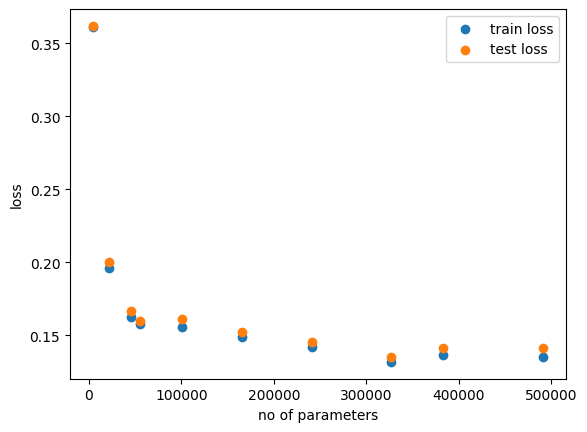

In [30]:
plt.scatter(parameter_counts, train_loss_list, label='train loss')
plt.scatter(parameter_counts, test_loss_list, label='test loss')
plt.xlabel('no of parameters')
plt.ylabel('loss')
plt.legend()

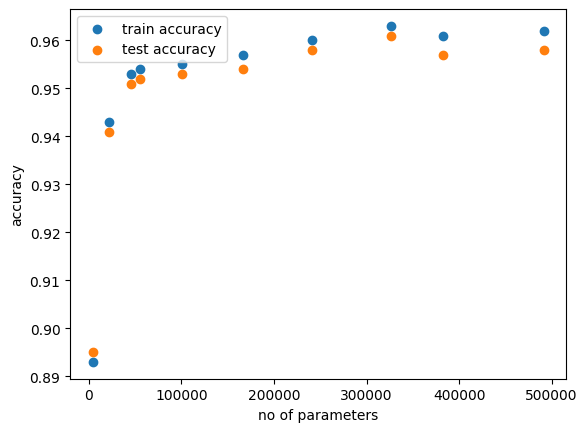

In [31]:
plt.scatter(parameter_counts, train_acc_list, label='train accuracy')
plt.scatter(parameter_counts, test_acc_list, label='test accuracy')
plt.xlabel('no of parameters')
plt.ylabel('accuracy')
plt.legend()

In [32]:
class CNNet3(torch.nn.Module):
    def __init__(self):
        super(CNNet3, self).__init__()

        #Convolutional layers
        self.conv1 = Conv2d(1, 6, 5)
        self.conv2 = Conv2d(6, 16, 5)

        # Feed Forward
        self.lin1 = Linear(16 * 5 * 5, 120)
        self.lin2 = Linear(120, 84)
        self.lin3 = Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))

        x = self.lin3(x)
        return x

In [33]:
def train(model, optimizer, train_loader):
    model.train()

    for batch_index, (data, truth) in enumerate(train_loader):
        data, truth = Variable(data), Variable(truth)
        optimizer.zero_grad()

        output = model(data)
        loss = criterion(output, truth)
        loss.backward()
        optimizer.step()

def calculate_loss(model, loader, criterion):
    num_correct = 0
    total_samples = 0
    cost_total_samples = 0
    cost_counter = 0
    with torch.no_grad():
        for batch in loader:
            data, truth = batch
            output = model(data)
            cost = criterion(output, truth)
            cost_total_samples += cost
            cost_counter += 1
            for i, output_tensor in enumerate(output):
                if torch.argmax(output_tensor) == truth[i]:
                    num_correct += 1
                total_samples += 1
    return cost_total_samples / cost_counter, round(num_correct/total_samples, 3)


def compute(model, optimizer):
    epochs = 10
    loss_train_list = []
    loss_test_list = []
    test_acc_list = []
    train_acc_list = []
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader)
        train_loss, train_acc = calculate_loss(model, train_loader, criterion)
        test_loss, test_acc = calculate_loss(model, test_loader, criterion)
        print("Train loss: ", train_loss)
        loss_train_list.append(train_loss)
        loss_test_list.append(test_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return loss_train_list, loss_test_list, train_acc_list, test_acc_list


def load_data(train_set_batch_size, test_set_batch_size):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_set_batch_size, shuffle=True)


    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_set_batch_size, shuffle=True)

    return (train_loader, test_loader)

criterion = CrossEntropyLoss()
train_loader, test_loader = load_data(500, 500)
model3 = CNNet3()
optimizer = SGD(model3.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute(model3, optimizer)

batch_param_2 = torch.nn.utils.parameters_to_vector(model3.parameters())

criterion = CrossEntropyLoss()
train_loader, test_loader = load_data(100, 100)
model1 = CNNet3()
optimizer = SGD(model1.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute(model1, optimizer)

batch_param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())

Train loss:  tensor(1.2136)
Train loss:  tensor(0.2550)
Train loss:  tensor(0.1724)
Train loss:  tensor(0.1224)
Train loss:  tensor(0.1003)
Train loss:  tensor(0.0832)
Train loss:  tensor(0.0744)
Train loss:  tensor(0.0779)
Train loss:  tensor(0.0605)
Train loss:  tensor(0.0540)
Train loss:  tensor(0.1137)
Train loss:  tensor(0.0666)
Train loss:  tensor(0.0528)
Train loss:  tensor(0.0501)
Train loss:  tensor(0.0345)
Train loss:  tensor(0.0267)
Train loss:  tensor(0.0244)
Train loss:  tensor(0.0234)
Train loss:  tensor(0.0130)
Train loss:  tensor(0.0151)


Text(0, 0.5, 'Accuracy')

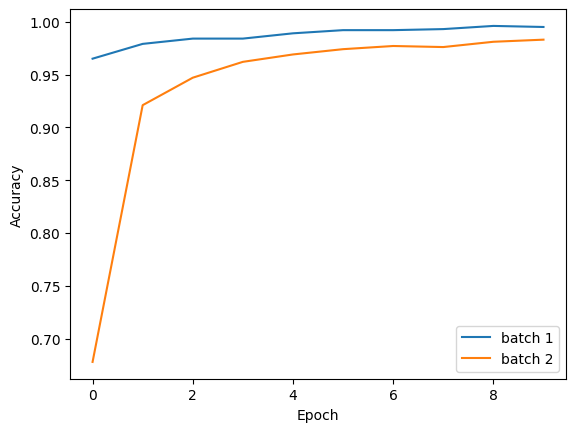

In [34]:
plt.plot(batch_1_train_acc, label='batch 1')
plt.plot(batch_2_train_acc, label='batch 2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [35]:
alpha_value = np.linspace(-2.0, 2.0, num = 50)
theta_list =[]
for i in range (len(alpha_value)):
    theta = (1-alpha_value[i])*batch_param_1 + alpha_value[i]* batch_param_2
    theta_list.append(theta)



alpha_train_loss_list = []
alpha_test_loss_list = []
alpha_train_acc_list = []
alpha_test_acc_list = []



for i in range (len(theta_list)):
    # torch.manual_seed(1)
    theta = (1-alpha_value[i])* batch_param_1 + alpha_value[i]*batch_param_2
    model = CNNet3()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, criterion)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, criterion)
    alpha_train_loss_list.append(alpha_train_loss)
    alpha_train_acc_list.append(alpha_train_acc)
    alpha_test_loss_list.append(alpha_test_loss)
    alpha_test_acc_list.append(alpha_test_acc)

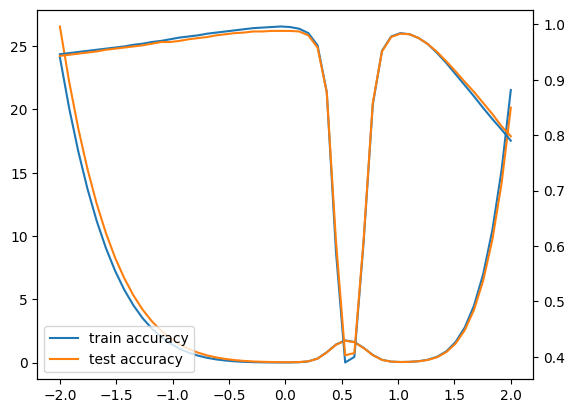

In [36]:
plt.plot(alpha_value, alpha_train_loss_list, label='train loss')
plt.plot(alpha_value, alpha_test_loss_list, label='test loss')

plt.twinx()

plt.plot(alpha_value, alpha_train_acc_list, label='train accuracy')
plt.plot(alpha_value, alpha_test_acc_list, label='test accuracy')

plt.legend()


In [37]:
def sensitivity(model):
    f_norm_all_samples = 0
    counter = 0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = p.grad
            func_norm = torch.linalg.norm(grad).numpy()
            f_norm_all_samples += func_norm
            counter += 1
    return f_norm_all_samples / counter

def define_optimizer(model, lr):
    return SGD(model.parameters(), lr = lr, momentum=0.9, nesterov=True)

batch_size = [100, 250, 500, 5000, 10000]
sensitivity_list = []
loss_train_list = []
loss_test_list = []
train_acc_list = []
test_acc_list = []

lr = 0.01
for bs in batch_size:
    torch.manual_seed(1)
    critereon = CrossEntropyLoss()
    train_loader, test_loader = load_data(bs, bs)
    model1 = CNNet3()
    optimizer = define_optimizer(model1, lr)
    loss_train_mdl, loss_test_mdl, train_acc_mdl, test_acc_mdl = compute(model1, optimizer)

    loss_train_list.append(loss_train_mdl[-1])
    loss_test_list.append(loss_test_mdl[-1])
    train_acc_list.append(train_acc_mdl[-1])
    test_acc_list.append(test_acc_mdl[-1])

    sensitivity_list.append(sensitivity(model1))

Train loss:  tensor(0.1144)
Train loss:  tensor(0.0830)
Train loss:  tensor(0.0516)
Train loss:  tensor(0.0408)
Train loss:  tensor(0.0422)
Train loss:  tensor(0.0286)
Train loss:  tensor(0.0245)
Train loss:  tensor(0.0212)
Train loss:  tensor(0.0185)
Train loss:  tensor(0.0174)
Train loss:  tensor(0.2682)
Train loss:  tensor(0.1315)
Train loss:  tensor(0.0856)
Train loss:  tensor(0.0669)
Train loss:  tensor(0.0628)
Train loss:  tensor(0.0488)
Train loss:  tensor(0.0468)
Train loss:  tensor(0.0406)
Train loss:  tensor(0.0362)
Train loss:  tensor(0.0310)
Train loss:  tensor(1.4460)
Train loss:  tensor(0.2385)
Train loss:  tensor(0.1549)
Train loss:  tensor(0.1117)
Train loss:  tensor(0.0946)
Train loss:  tensor(0.0780)
Train loss:  tensor(0.0752)
Train loss:  tensor(0.0613)
Train loss:  tensor(0.0557)
Train loss:  tensor(0.0512)
Train loss:  tensor(2.3017)
Train loss:  tensor(2.2980)
Train loss:  tensor(2.2933)
Train loss:  tensor(2.2864)
Train loss:  tensor(2.2740)
Train loss:  tensor(

Text(0, 0.5, 'Loss')

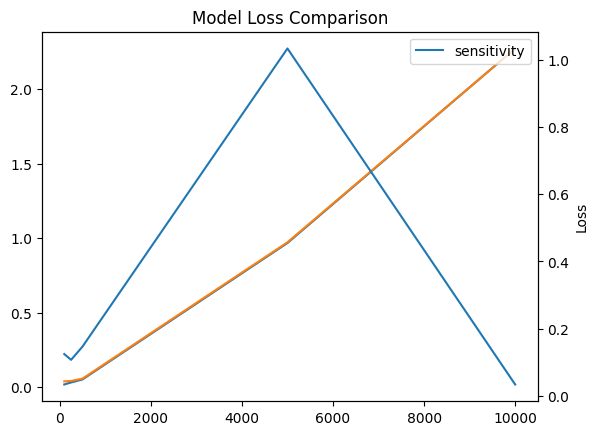

In [38]:
plt.plot(batch_size, loss_train_list, label="loss train")
plt.plot(batch_size, loss_test_list, label="loss test")

plt.twinx()

plt.plot(batch_size, sensitivity_list, label="sensitivity")
plt.title('Model Loss Comparison')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

